# Plot alignment statistics of barcode library

## Load libraries and define analysis-specific parameters

In [65]:
suppressMessages(library(Biostrings))
suppressMessages(library(plyranges))
suppressMessages(library(tidyverse))

## Read alignment log

In [66]:
align_log <- list.files("../data/alignments/", pattern = "*.log", full.names = T) %>% 
  enframe("sno", "file") %>% 
  mutate(log = map(file, readLines)) %>% 
  mutate(sample_name = str_extract(file, "[^/]+(?=.bowtie2.log)")) %>% 
  select(-sno, -file) %>% 
  unnest() %>% 
  print()

Warning message:
“`cols` is now required when using unnest().
Please use `cols = c(log)`”


# A tibble: 60 × 2
   log                                            sample_name                   
   <chr>                                          <chr>                         
 1 "7977034 reads; of these:"                     dicodon_facs_off_high_1_barco…
 2 "  7977034 (100.00%) were unpaired; of these:" dicodon_facs_off_high_1_barco…
 3 "    2092479 (26.23%) aligned 0 times"         dicodon_facs_off_high_1_barco…
 4 "    5884395 (73.77%) aligned exactly 1 time"  dicodon_facs_off_high_1_barco…
 5 "    160 (0.00%) aligned >1 times"             dicodon_facs_off_high_1_barco…
 6 "73.77% overall alignment rate"                dicodon_facs_off_high_1_barco…
 7 "4892862 reads; of these:"                     dicodon_facs_off_high_2_barco…
 8 "  4892862 (100.00%) were unpaired; of these:" dicodon_facs_off_high_2_barco…
 9 "    1338465 (27.36%) aligned 0 times"         dicodon_facs_off_high_2_barco…
10 "    3554320 (72.64%) aligned exactly 1 time"  dicodon_facs_off_high_2_barco…
# … with 

##  How many total reads and reads with expected barcodes?


── Column specification ────────────────────────────────────────────────────────
cols(
  sample_name = col_character(),
  type = col_character(),
  count = col_double()
)



# A tibble: 30 × 4
   sample_name                       read  type     count
   <chr>                             <chr> <chr>    <dbl>
 1 dicodon_facs_off_high_1_barcode_1 total all    7977034
 2 dicodon_facs_off_high_1_barcode_1 aln   unique 5884395
 3 dicodon_facs_off_high_1_barcode_1 aln   multi      160
 4 dicodon_facs_off_high_2_barcode_1 total all    4892862
 5 dicodon_facs_off_high_2_barcode_1 aln   unique 3554320
 6 dicodon_facs_off_high_2_barcode_1 aln   multi       77
 7 dicodon_facs_off_low_1_barcode_1  total all    4224353
 8 dicodon_facs_off_low_1_barcode_1  aln   unique 2324273
 9 dicodon_facs_off_low_1_barcode_1  aln   multi       99
10 dicodon_facs_off_low_2_barcode_1  total all    3470553
# … with 20 more rows


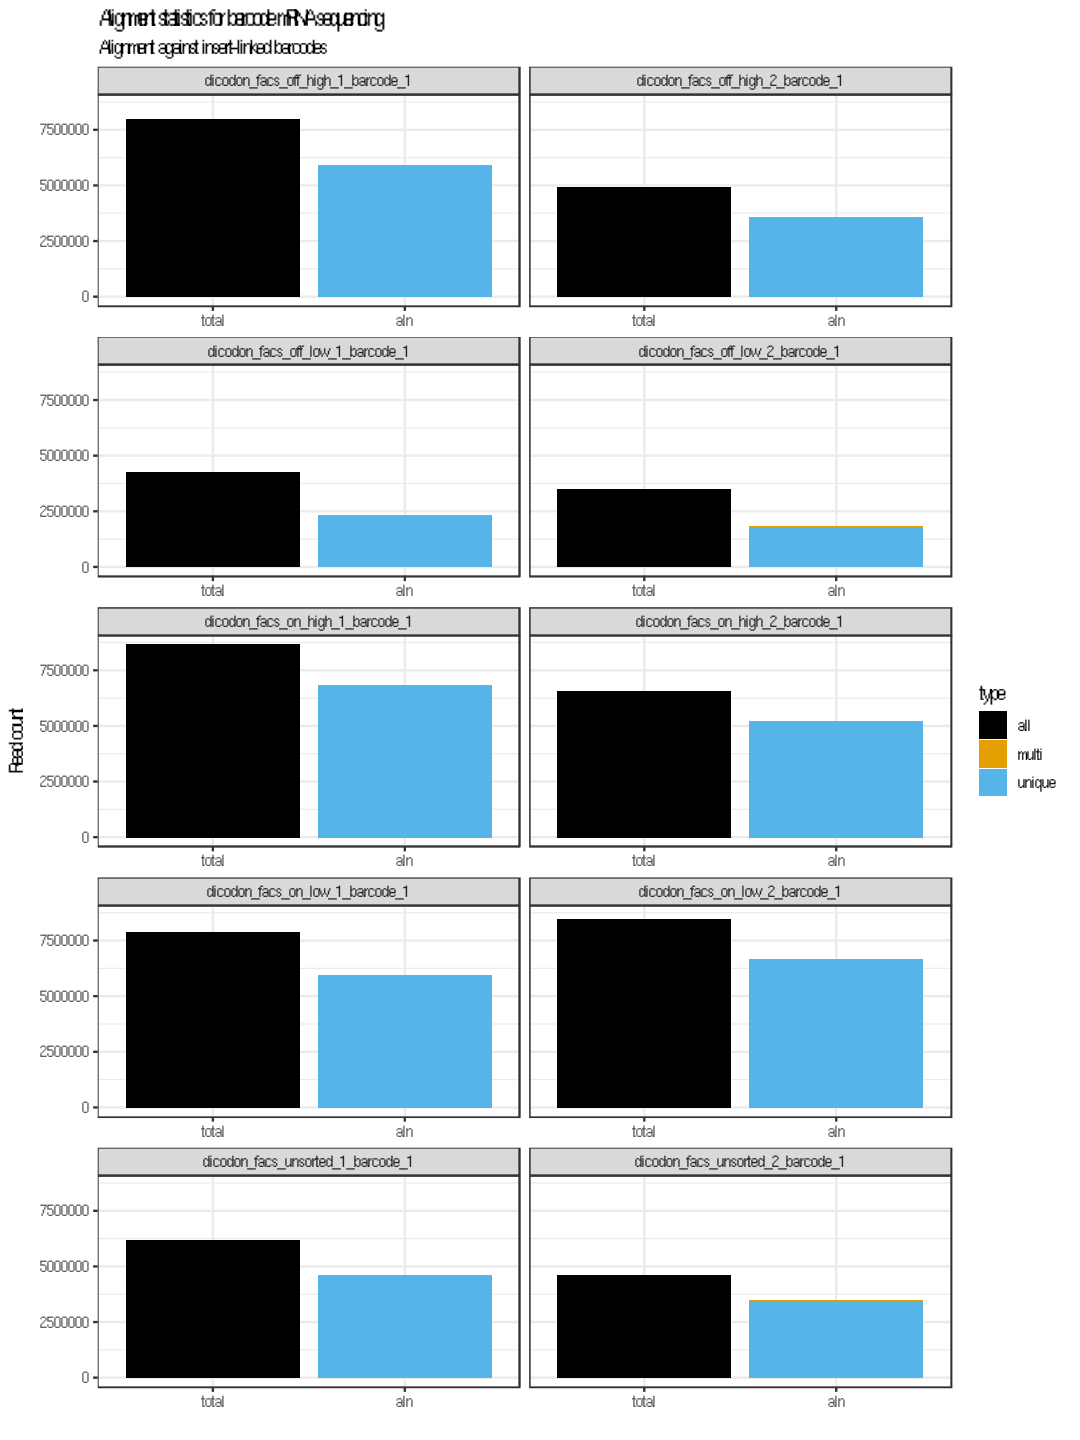

In [67]:
options(repr.plot.width=9, repr.plot.height=12)

plot_data <- align_log %>% 
  mutate(total_all = str_extract(log, "^[:digit:]+(?= reads;)")) %>% 
  mutate(aln_unique = str_extract(log, "[:digit:]+(?=.+exactly)")) %>% 
  mutate(aln_multi = str_extract(log, "[:digit:]+(?=.+>1)")) %>% 
  select(-log) %>% 
  pivot_longer(-sample_name, names_to = 'type', values_to = 'count') %>% 
  filter(!is.na(count)) %>% 
  type_convert() %>% 
  separate(type, c("read", "type")) %>% 
  print()

plot_data %>% 
  ggplot(aes(x = fct_rev(read), y = count, fill = type)) +
  facet_wrap(~sample_name, ncol = 2, scales = "free_x") +
  geom_col() +
  ggthemes::scale_fill_colorblind() +
  theme_bw() +
  labs(x = "", y = "Read count",
       title = "Alignment statistics for barcode mRNA sequencing",
       subtitle = "Alignment against insert-linked barcodes")

## Get readcounts for each barcode

In [68]:
barcode_counts <- list.files("../data/barcode_counts/", pattern = ".tsv.gz$", full.names = T) %>% 
  enframe("sno", "file") %>% 
  mutate(counts = map(file, read_tsv)) %>% 
  mutate(sample_name = str_extract(file, "[^/]+(?=.tsv.gz)")) %>% 
  select(-sno, -file) %>% 
  unnest() %>% 
  rename(barcode_count = count, barcode_num = barcode) %>% 
  mutate(sample_name = str_extract(sample_name, ".+(?=_barcode)")) %>% 
  print()

Rows: 82612 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): barcode, count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 70197 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): barcode, count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 28465 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): barcode, count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 27723 Columns: 2
── Column specification ────────────────────────────────────────────────────────

# A tibble: 646,204 × 3
   barcode_num barcode_count sample_name            
         <dbl>         <dbl> <chr>                  
 1      249880          3970 dicodon_facs_off_high_1
 2      398088          3734 dicodon_facs_off_high_1
 3       88292          2820 dicodon_facs_off_high_1
 4      423688          2801 dicodon_facs_off_high_1
 5      317485          2651 dicodon_facs_off_high_1
 6      430480          2462 dicodon_facs_off_high_1
 7        1303          2452 dicodon_facs_off_high_1
 8      393860          2296 dicodon_facs_off_high_1
 9      396693          2178 dicodon_facs_off_high_1
10      358101          2083 dicodon_facs_off_high_1
# … with 646,194 more rows


## Get insert-barcode linkages

In [69]:
align_log <- list.files("../data/alignments/", pattern = "*.log", full.names = T) %>% print 

insert_barcode_linkages <- list.files("../../pool1_linkage/data/filtered_barcodes/", 
                                      pattern = ".tsv.gz$", full.names = T) %>% 
  enframe("sno", "file") %>% 
  mutate(counts = map(file, read_tsv)) %>% 
  mutate(sample_name = str_extract(file, "[^/]+(?=.tsv.gz)")) %>% 
  select(-sno, -file) %>% 
  unnest(cols = c(counts)) %>%
  rename(linkage_count = read_count, linkage_ref = sample_name) %>% 
  select(-barcode_1) %>%
  print()

 [1] "../data/alignments//dicodon_facs_off_high_1_barcode_1.bowtie2.log"
 [2] "../data/alignments//dicodon_facs_off_high_2_barcode_1.bowtie2.log"
 [3] "../data/alignments//dicodon_facs_off_low_1_barcode_1.bowtie2.log" 
 [4] "../data/alignments//dicodon_facs_off_low_2_barcode_1.bowtie2.log" 
 [5] "../data/alignments//dicodon_facs_on_high_1_barcode_1.bowtie2.log" 
 [6] "../data/alignments//dicodon_facs_on_high_2_barcode_1.bowtie2.log" 
 [7] "../data/alignments//dicodon_facs_on_low_1_barcode_1.bowtie2.log"  
 [8] "../data/alignments//dicodon_facs_on_low_2_barcode_1.bowtie2.log"  
 [9] "../data/alignments//dicodon_facs_unsorted_1_barcode_1.bowtie2.log"
[10] "../data/alignments//dicodon_facs_unsorted_2_barcode_1.bowtie2.log"


Rows: 434975 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode_1
dbl (3): insert_num, barcode_num, read_count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 434,975 × 4
   insert_num barcode_num linkage_count linkage_ref    
        <dbl>       <dbl>         <dbl> <chr>          
 1       4888           1             1 dicodon_linkage
 2       1037           2             1 dicodon_linkage
 3       1290           3             1 dicodon_linkage
 4       4911           4             1 dicodon_linkage
 5       1079           5             1 dicodon_linkage
 6       4562           6             1 dicodon_linkage
 7       1093           7             1 dicodon_linkage
 8       5206           8             1 dicodon_linkage
 9        332           9             1 dicodon_linkage
10       4813          10             1 dicodon_linkage
# … with 434,965 more rows


## Get sample annotations

In [70]:

sample_annotations <- read_csv("../annotations/sample_annotations.csv", comment = "#") %>% print()

Rows: 10 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): owner, sample_name, plasmid, library_type, sample_id, linkage_ref
dbl (5): barcode1_read, barcode1_start, barcode1_length, barcode1_trim5, bar...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 10 × 11
   owner sampl…¹ plasmid libra…² sampl…³ barco…⁴ barco…⁵ barco…⁶ linka…⁷ barco…⁸
   <chr> <chr>   <chr>   <chr>   <chr>     <dbl>   <dbl>   <dbl> <chr>     <dbl>
 1 pb    dicodo… pPBHS2… grna    104p10        1       0      24 dicodo…       3
 2 pb    dicodo… pPBHS2… grna    104p9         1       0      24 dicodo…       3
 3 pb    dicodo… pPBHS2… grna    104p8         1       0      24 dicodo…       3
 4 pb    dicodo… pPBHS2… grna    104p7         1       0      24 dicodo…       3
 5 pb    dicodo… pPBHS2… grna    104p6         1       0      24 dicodo…       3
 6 pb    dicodo… pPBHS2… grna    104p5         1       0      24 dicodo…       3
 7 pb    dicodo… pPBHS2… grna    104p4         1       0      24 dicodo…       3
 8 pb    dicodo… pPBHS2… grna    104p3         1       0      24 dicodo…       3
 9 pb    dicodo… pPBHS2… grna    104p2         1       0      24 dicodo…       3
10 pb    dicodo… pPBHS2… grna    104p1         1       0      24 dicodo…       3
# … with

## Combine barcodes counts with insert linkages

In [71]:
barcode_insert_counts <- barcode_counts %>% 
  left_join(select(sample_annotations, sample_name, linkage_ref, sample_id, library_type), by = "sample_name") %>% 
  left_join(insert_barcode_linkages, by = c("linkage_ref", "barcode_num")) %>%
  print()

# A tibble: 646,204 × 8
   barcode_num barcode_count sample_name linka…¹ sampl…² libra…³ inser…⁴ linka…⁵
         <dbl>         <dbl> <chr>       <chr>   <chr>   <chr>     <dbl>   <dbl>
 1      249880          3970 dicodon_fa… dicodo… 104p3   grna        696      32
 2      398088          3734 dicodon_fa… dicodo… 104p3   grna        514      85
 3       88292          2820 dicodon_fa… dicodo… 104p3   grna        687       8
 4      423688          2801 dicodon_fa… dicodo… 104p3   grna       5308     123
 5      317485          2651 dicodon_fa… dicodo… 104p3   grna       3629      47
 6      430480          2462 dicodon_fa… dicodo… 104p3   grna       4915     154
 7        1303          2452 dicodon_fa… dicodo… 104p3   grna       3842       1
 8      393860          2296 dicodon_fa… dicodo… 104p3   grna       2939      81
 9      396693          2178 dicodon_fa… dicodo… 104p3   grna       3491      84
10      358101          2083 dicodon_fa… dicodo… 104p3   grna         10      61
# … 

# Write barcode insert counts to a table for post-processing

In [72]:
barcode_insert_counts %>% 
  select(sample_id, sample_name, insert_num, barcode_num, barcode_count, linkage_count, library_type, linkage_ref) %>% 
  write_tsv('../tables/sample_insert_barcode_counts.tsv.gz') %>%
  print()

# A tibble: 646,204 × 8
   sample_id sample_name         inser…¹ barco…² barco…³ linka…⁴ libra…⁵ linka…⁶
   <chr>     <chr>                 <dbl>   <dbl>   <dbl>   <dbl> <chr>   <chr>  
 1 104p3     dicodon_facs_off_h…     696  249880    3970      32 grna    dicodo…
 2 104p3     dicodon_facs_off_h…     514  398088    3734      85 grna    dicodo…
 3 104p3     dicodon_facs_off_h…     687   88292    2820       8 grna    dicodo…
 4 104p3     dicodon_facs_off_h…    5308  423688    2801     123 grna    dicodo…
 5 104p3     dicodon_facs_off_h…    3629  317485    2651      47 grna    dicodo…
 6 104p3     dicodon_facs_off_h…    4915  430480    2462     154 grna    dicodo…
 7 104p3     dicodon_facs_off_h…    3842    1303    2452       1 grna    dicodo…
 8 104p3     dicodon_facs_off_h…    2939  393860    2296      81 grna    dicodo…
 9 104p3     dicodon_facs_off_h…    3491  396693    2178      84 grna    dicodo…
10 104p3     dicodon_facs_off_h…      10  358101    2083      61 grna    dicodo…
# … 

## Plot the number of barcodes per library

- Note that Unsorted_1 is gRNA (generated by T7 transcription and subsequent RT), whereas Unsorted_2 is directly amplified gDNA. 
- We see that directly amplifying gDNA from the same sample results in ~5-fold less read coverage. 

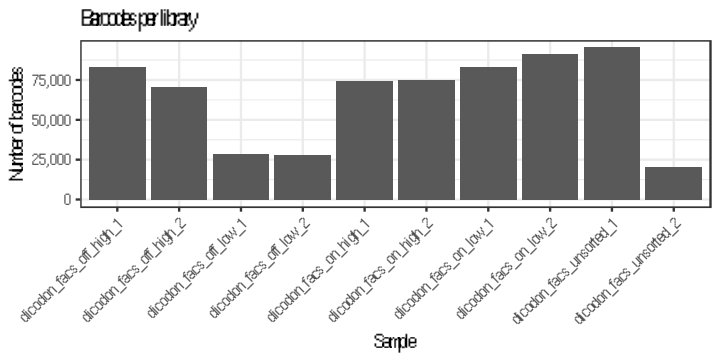

In [73]:
options(repr.plot.width=6, repr.plot.height=3)

plot_data <- barcode_insert_counts %>% 
  group_by(sample_name) %>% 
  distinct(barcode_num) %>% 
  summarize(n_barcodes = dplyr::n()) %>% 
  ungroup()

plot_data %>% 
  ggplot(aes(x = sample_name, y = n_barcodes)) +
  geom_col(position = "dodge") +
  theme_bw() +
  scale_y_continuous(labels = scales::comma) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Sample", y = "Number of barcodes", title = "Barcodes per library") +
  NULL

## Plot CDF of the number of reads per barcode

# A tibble: 646,204 × 9
   barcode_num barcode_c…¹ sampl…² linka…³ sampl…⁴ libra…⁵ inser…⁶ linka…⁷ xaxis
         <dbl>       <dbl> <chr>   <chr>   <chr>   <chr>     <dbl>   <dbl> <int>
 1        1303        6974 dicodo… dicodo… 104p6   grna       3842       1     1
 2        1303        5839 dicodo… dicodo… 104p2   grna       3842       1     1
 3      361413        4238 dicodo… dicodo… 104p1   grna       4409      63     1
 4      249880        4137 dicodo… dicodo… 104p10  grna        696      32     1
 5      249880        3970 dicodo… dicodo… 104p3   grna        696      32     1
 6       76636        3884 dicodo… dicodo… 104p4   grna       2367       7     1
 7      398088        3734 dicodo… dicodo… 104p3   grna        514      85     2
 8      246436        3674 dicodo… dicodo… 104p1   grna       2786      31     2
 9      410349        3634 dicodo… dicodo… 104p10  grna       5383      98     2
10      420384        3556 dicodo… dicodo… 104p1   grna       3784     115     3
# … 

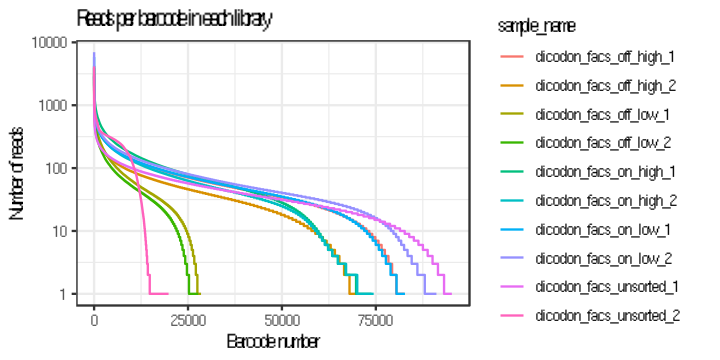

In [74]:
options(repr.plot.width=6, repr.plot.height=3)

plot_data <- barcode_insert_counts %>% 
  group_by(sample_name) %>% 
  arrange(-barcode_count) %>% 
  mutate(xaxis = 1:(dplyr::n())) %>% 
  ungroup() %>% 
  print()

plot_data %>% 
  ggplot(aes(x = xaxis, y = barcode_count, color = sample_name)) +
  geom_line(aes(group = sample_name)) +
  theme_bw() +
  scale_y_log10() +
  labs(x = "Barcode number", y = "Number of reads",
       title = "Reads per barcode in each library") +
  NULL

## Plot CDF of the number of reads per insert, summed over barcodes

`summarise()` has grouped output by 'sample_name'. You can override using the
`.groups` argument.


# A tibble: 56,670 × 4
   sample_name             insert_num read_count xaxis
   <chr>                        <dbl>      <dbl> <int>
 1 dicodon_facs_off_high_1       3900      14330     1
 2 dicodon_facs_off_low_1        3132      13953     1
 3 dicodon_facs_off_high_1       3267      12770     2
 4 dicodon_facs_off_low_1        3888      12482     2
 5 dicodon_facs_on_high_1         171      11267     1
 6 dicodon_facs_on_low_2           17      11126     1
 7 dicodon_facs_off_high_1       3132      11005     3
 8 dicodon_facs_on_low_1           17      10940     1
 9 dicodon_facs_off_low_2        3132      10578     1
10 dicodon_facs_off_low_1        4080      10523     3
# … with 56,660 more rows


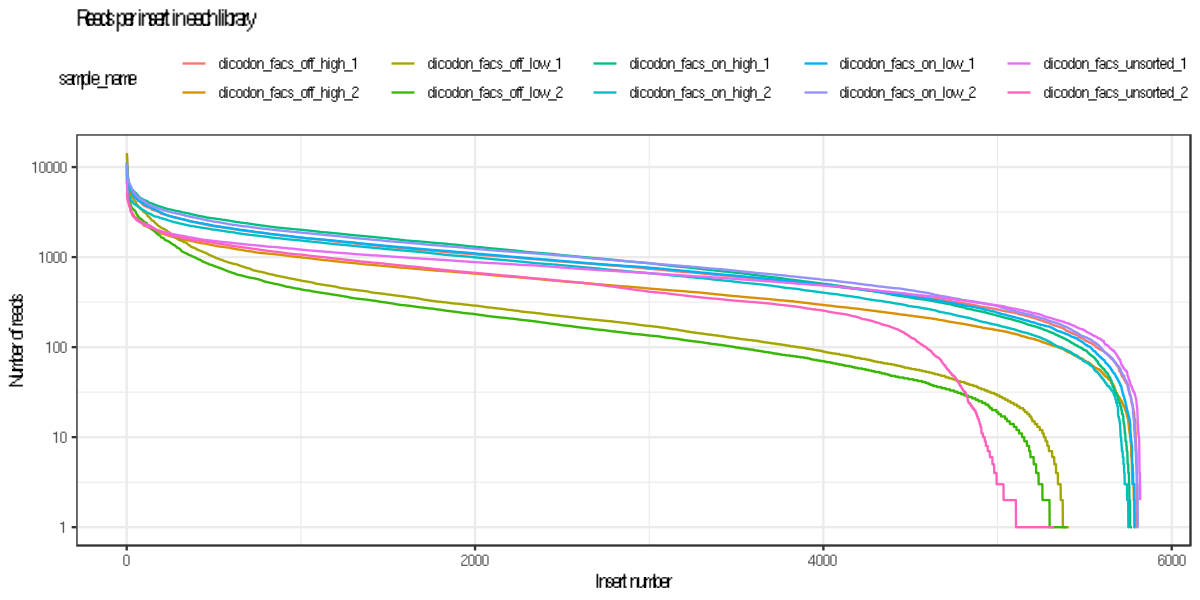

In [75]:
options(repr.plot.width=10, repr.plot.height=5)

plot_data <- barcode_insert_counts %>% 
  group_by(sample_name, insert_num) %>% 
  summarize(read_count = sum(barcode_count)) %>% 
  ungroup() %>% 
  group_by(sample_name) %>% 
  arrange(-read_count) %>% 
  mutate(xaxis = 1:(dplyr::n())) %>% 
  ungroup() %>% 
  print()

plot_data %>% 
  ggplot(aes(x = xaxis, y = read_count, color = sample_name)) +
  geom_line(aes(group = sample_name)) +
  theme_bw() +
  theme(legend.position = "top") +
  scale_y_log10() +
  labs(x = "Insert number", y = "Number of reads",
       title = "Reads per insert in each library") +
  NULL

## Plot read counts of mRNA vs gRNA, summed for each insert


Warning message:
“Expected 5 pieces. Missing pieces filled with `NA` in 115058 rows [531147, 531148, 531149, 531150, 531151, 531152, 531153, 531154, 531155, 531156, 531157, 531158, 531159, 531160, 531161, 531162, 531163, 531164, 531165, 531166, ...].”
`summarise()` has grouped output by 'insert_num', 'diag', 'high_low'. You can
override using the `.groups` argument.


# A tibble: 5,845 × 11
   insert_num off_high_1 off_h…¹ off_l…² off_l…³ on_hi…⁴ on_hi…⁵ on_lo…⁶ on_lo…⁷
        <dbl>      <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
 1          0       2146     835    1335    1304    1055     660     853     899
 2          1       1667     912     620     734    4347    3795    6240    6615
 3          2       5526    4179    6768    5027     823     335    1936    2163
 4          3        987     467      50      18    1926    1171    3998    2051
 5          4       1501     420     509     330    1960    1912    6356    6138
 6          5       1279     847     502     492    1984    1814    2405    3690
 7          6        591     635     419     103    1094     997    2491    2172
 8          7       1319     966     760    1031     808    1164    1094    1341
 9          8       6570    3685     707     533    2523    3049    4187    5262
10          9        846     715     473     427    2726    1882    2223    2657
# … w

Warning message:
“Removed 699 rows containing non-finite values (stat_density2d_filled).”
Warning message:
“Removed 699 rows containing missing values (geom_point).”


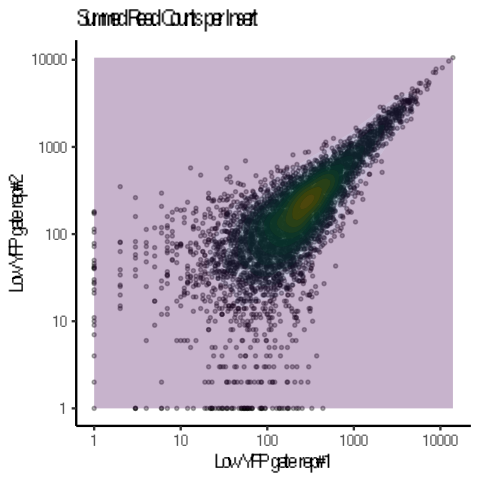

In [76]:
options(repr.plot.width=4, repr.plot.height=4)

plot_data <- barcode_insert_counts %>%
  # Split sample name into name and replicate columns
  separate(col = sample_name, into = c("dicodon", "facs", "diag", "high_low", "replicate"), sep = "\\_") %>% 
  # Grab only columns with unique info 
  select(barcode_num, barcode_count, diag, high_low, replicate, insert_num, linkage_count) %>%
  group_by(insert_num, diag, high_low, replicate) %>%
  summarize(read_count = sum(barcode_count)) %>%
  ungroup() %>%
  select(insert_num, read_count, diag, high_low, replicate) %>% 
  pivot_wider(names_from = c("diag", "high_low", "replicate"), values_from = "read_count") %>%
  print()

plot_data %>%
  # Specify replicates to compare here
  ggplot(aes(x = off_low_1, y = off_low_2)) +
  geom_point(alpha = 0.3, size = 0.5) +
  geom_density_2d_filled(alpha = 0.3, show.legend = F) +
  theme_classic() +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "Low YFP gate rep#1", y = "Low YFP gate rep#2",
       title = "Summed Read Counts per Insert") +
  NULL